---
title: "Creating Visualisation with Python"
---

# Analyse Shehei Ohtani's Performance

In this chapter, we want to explore some common charts using Python. We will continue to use Pandas whenever we can.

- [MLB Glossary](https://www.mlb.com/glossary)

In [5]:
import pandas as pd
import sqlite3

# Use 'with' to ensure the connection is properly closed after use
with sqlite3.connect("resources/mlb2023.db") as conn:
    # Write your SQL query
    query = "SELECT * FROM batting"
    
    # Read data from the database into a pandas DataFrame
    mlb = pd.read_sql_query(query, conn)


with sqlite3.connect("resources/mlbpost2023.db") as conn:
    # Write your SQL query
    query = "SELECT * FROM batting"
    
    # Read data from the database into a pandas DataFrame
    mlbpost = pd.read_sql_query(query, conn)


In [7]:
# show first few rows
mlb.head()

playerID  yearID  stint teamID lgID   G G_batting  AB  R  H  ...  SB  CS  \
0  aardsda01    2004      1    SFN   NL  11             0  0  0  ...   0   0   
1  aardsda01    2006      1    CHN   NL  45             2  0  0  ...   0   0   
2  aardsda01    2007      1    CHA   AL  25             0  0  0  ...   0   0   
3  aardsda01    2008      1    BOS   AL  47             1  0  0  ...   0   0   
4  aardsda01    2009      1    SEA   AL  73             0  0  0  ...   0   0   

   BB SO IBB HBP  SH SF GIDP G_old  
0   0  0   0   0   0  0    0        
1   0  0   0   0   1  0    0        
2   0  0   0   0   0  0    0        
3   0  1   0   0   0  0    0        
4   0  0   0   0   0  0    0        

[5 rows x 24 columns]

In [15]:
# Shohei Ohtani's playerID is: ohtansh01
filter = mlb["playerID"] == "ohtansh01"
ohtani = mlb[filter]

75963    22
75964    18
75965     7
75966    46
75967    34
75968    44
Name: HR, dtype: int64

In [16]:

# Show all the columns (fields)
ohtani.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'G_batting', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'G_old'],
      dtype='object')

## Bar Chart

In [27]:
ohtani[["yearID", "HR"]]

yearID  HR
75963    2018  22
75964    2019  18
75965    2020   7
75966    2021  46
75967    2022  34
75968    2023  44

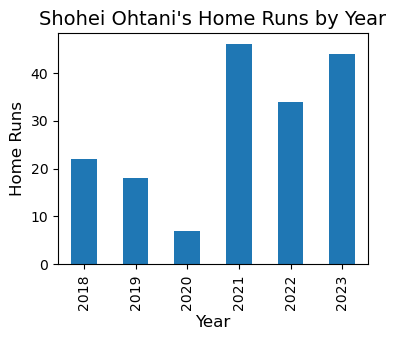

In [24]:
ohtani.plot(x="yearID", y="HR", kind="bar", legend=False, figsize=(4,3))

# Add chart details
plt.title("Shohei Ohtani's Home Runs by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)

# Display the plot
plt.show()

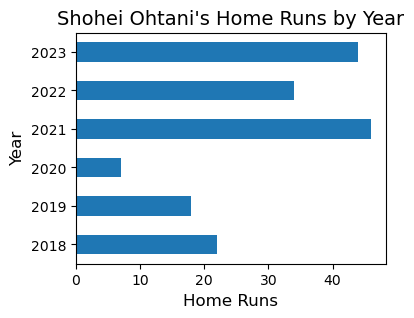

In [40]:
ohtani.plot(x="yearID", y="HR", kind="barh", legend=False, figsize=(4,3))

# Add chart details
plt.title("Shohei Ohtani's Home Runs by Year", fontsize=14)
plt.xlabel("Home Runs", fontsize=12)
plt.ylabel("Year", fontsize=12)


# Display the plot
plt.show()

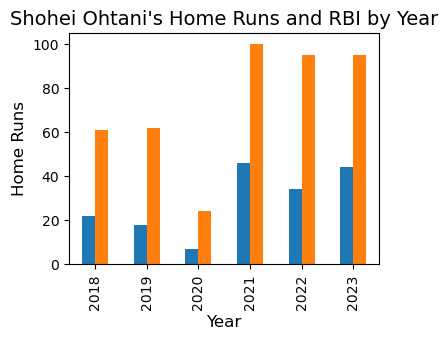

In [31]:
ohtani.plot(x="yearID", y=["HR", "RBI"], kind="bar", legend=False, figsize=(4,3))

# Add chart details
plt.title("Shohei Ohtani's Home Runs and RBI by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)

# Display the plot
plt.show()

## Line Graph

In [41]:
ohtani[["yearID", "HR", "SB"]]

yearID  HR  SB
75963    2018  22  10
75964    2019  18  12
75965    2020   7   7
75966    2021  46  26
75967    2022  34  11
75968    2023  44  20

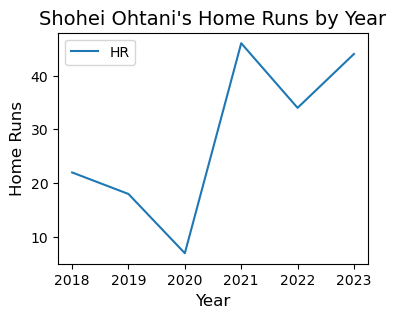

In [44]:
ohtani.plot(x="yearID", y="HR", figsize=(4,3))

# Add chart details
plt.title("Shohei Ohtani's Home Runs by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)

# Display the plot
plt.show()

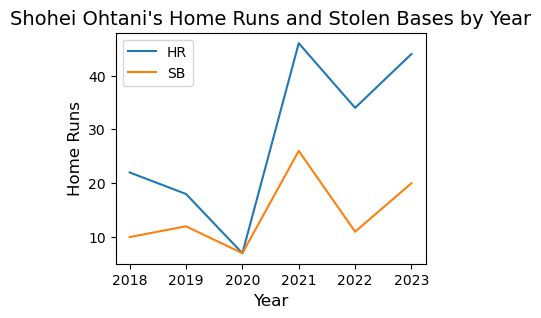

In [43]:
ohtani.plot(x="yearID", y=["HR", "SB"], figsize=(4,3))

# Add chart details
plt.title("Shohei Ohtani's Home Runs and Stolen Bases by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)

# Display the plot
plt.show()

## Pie Graph

In [34]:
ohtani.set_index('yearID')['HR']

yearID
2018    22
2019    18
2020     7
2021    46
2022    34
2023    44
Name: HR, dtype: int64

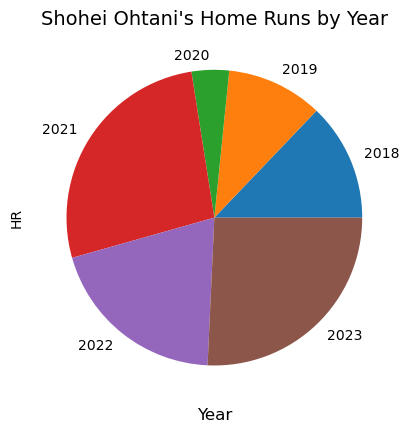

In [35]:
ohtani.set_index('yearID')['HR'].plot(kind="pie")

# Add chart details
plt.title("Shohei Ohtani's Home Runs by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)

# Display the plot
plt.show()

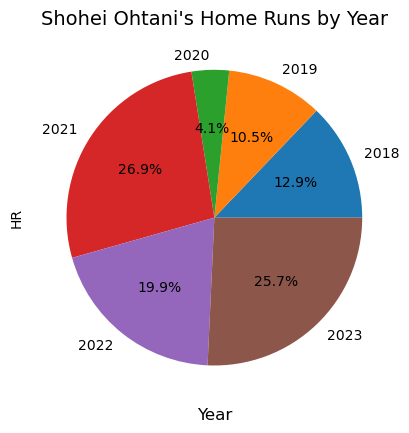

In [36]:
ohtani.set_index('yearID')['HR'].plot(kind="pie", autopct='%1.1f%%')

# Add chart details
plt.title("Shohei Ohtani's Home Runs by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)

# Display the plot
plt.show()

## Advanced Statistics

In [47]:
ohtani2 = ohtani.copy()

In [57]:
ohtani[["yearID", "AB", "H", "2B", "3B", "HR", "BB"]]
ohtani2["AVG"] = ohtani["H"] / ohtani["AB"]

## Histogram

In [67]:
angels_2023 = mlb[(mlb["yearID"] == 2023) & (mlb["teamID"] == "LAA") & (mlb["AB"] != 0)]
angels2023[["AB", "H", "HR"]]

AB    H  HR
506      39    5   0
641      58   12   3
14384    53   11   1
22036    50   10   1
27498   485  127  26
29746   178   39   2
32202    89   22   2
39328   194   42   8
56909    51   11   2
70478   311   87  14
72090   237   56   8
73970   289   65   9
75957   182   43  14
75968   497  151  44
76017     2    0   0
77621     8    1   0
78097    40    4   0
80689    63   11   3
84995   148   35   2
85004   459  111  19
85012   394  104  16
91314   109   30   1
96644     9    2   0
97961    62   18   0
101636  262   56   9
103699  308   81  18
104500  214   64   2
105414   81   14   2
106998  157   31   7
107153  104   13   4
107485  356   90  14

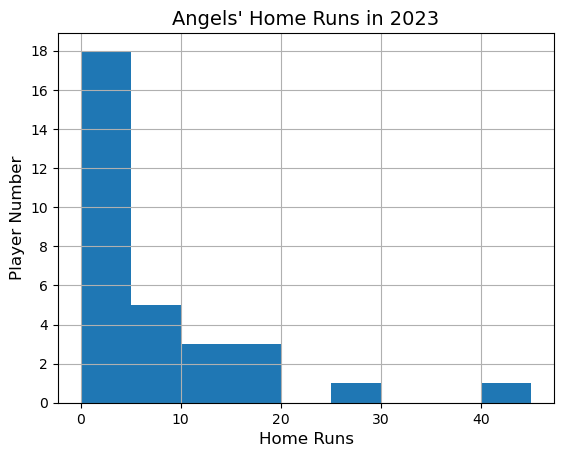

In [77]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Calculate the number of bins based on the data range and desired bin width
bin_width = 5
min_hr = 0
max_hr = angels_2023["HR"].max()
bins = range(0, int(max_hr) + bin_width, bin_width)

# Plot the histogram with specified bin width
angels_2023["HR"].plot(kind="hist", bins=bins)

# Add chart details
plt.title("Angels' Home Runs in 2023", fontsize=14)
plt.xlabel("Home Runs", fontsize=12)
plt.ylabel("Player Number", fontsize=12)

# Ensure y-axis has whole number ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the grid
plt.grid(True)

# Display the plot
plt.show()

In [45]:
# show first few rows
mlbpost.head()

yearID round   playerID teamID lgID  G  AB  R  H  2B  ...  RBI  SB  CS  BB  \
0    1884    WS  becanbu01    NY4   AA  1   2  0  1   0  ...    0   0       0   
1    1884    WS  bradyst01    NY4   AA  3  10  1  0   0  ...    0   0       0   
2    1884    WS  carrocl01    PRO   NL  3  10  2  1   0  ...    1   0       1   
3    1884    WS  dennyje01    PRO   NL  3   9  3  4   0  ...    2   0       0   
4    1884    WS  esterdu01    NY4   AA  3  10  0  3   1  ...    0   1       0   

  SO  IBB  HBP  SH SF GIDP  
0  0    0                   
1  1    0                   
2  1    0                   
3  3    0                   
4  3    0                   

[5 rows x 22 columns]

In [46]:
mlbpost.columns

Index(['yearID', 'round', 'playerID', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')